In [0]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
class Centroid:
    def __init__(self, loc):
        self.loc = loc
        self.points = []
        self.previous = []
        self.color = None

In [0]:
# generate random data points
r = lambda: np.random.uniform(0, 10)

class KMeans:

    def __init__(self, n_centroids=4):
        self.n_centroids = n_centroids
        self.centroids = []

        # generate initial centroids
        for _ in range(n_centroids):
            self.centroids.append(Centroid(np.array([r(), r()])))

        # assign a color to each centroid
        colors = cm.rainbow(np.linspace(0, 1, len(self.centroids)))
        for i, c in enumerate(self.centroids):
            c.color = colors[i]

    def sample_data(self, samples=100):
        self.X = [[r(), r()] for _ in range(samples)]

    def plot(self):
        for i, c in enumerate(self.centroids):
            plt.scatter(c.loc[0], c.loc[1], marker='o', color=c.color, s=100)
            x_values = [x[0] for x in c.points]
            y_values = [y[1] for y in c.points]

            plt.scatter(x_values, y_values, marker='.', color=c.color)

        title = 'KMeans'
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.savefig('{}.png'.format(title))
        plt.plot()

    def assign(self, x):
        distances = {}
        for centroid in self.centroids:
            distances[centroid] = np.linalg.norm(centroid.loc - x)

        closest = min(distances.items(), key=operator.itemgetter(1))[0]
        return closest

    def update(self, reset=True):
        for centroid in self.centroids:
            centroid.previous = centroid.points
            x_value = [x[0] for x in centroid.points]
            y_value = [y[1] for y in centroid.points]

            centroid.loc[0] = sum(x_value) / len(x_value)
            centroid.loc[1] = sum(y_value) / len(y_value)

            if reset:
                centroid.points = []

    def fit(self):
        fit = False
        while not fit:
            for point in self.X:
                closest = self.assign(point)
                closest.points.append(point)

            if len([c for c in self.centroids if
                    c.points == c.previous]) == self.n_centroids:
                fit = True
                self.update(reset=False)

            else:
                self.update()

    def predict(self, point):
        closest = self.assign(point)
        closest.points.append(point)
        print(closest.loc)

[3.66891002 2.5716572 ]


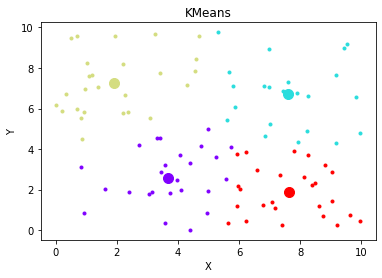

In [52]:
km = KMeans()
km.sample_data()
km.assign(km.X[0])
km.fit()
km.predict([5, 5])
km.plot()